### 11. Find the third Taylor polynomial $P_3 (x)$ for the function $f(x) = (x-1) \ln{x} \text{ about } x_0 = 1.$

a. Use $P_3 (0.5)$ to approximate $f(0.5).$ Find an upper bound for error $ \left| f (0.5) − P_3 (0.5) \right| $ using the error formula, and compare it to the actual error.

b. Find a bound for the error $\left| f(x) − P_3(x) \right|$ in using $P_3(x)$ to approximate $f(x)$ on the interval
$[0.5, 1.5].$

c. Approximate $ \int_{0.5}^{1.5} f (x)~dx$ using $\int_{0.5}^{1.5} P_3(x)~dx.$

d. Find an upper bound for the error in c) using $\int_{0.5}^{1.5} \left| R_3 (x)~dx \right|,$ and compare the bound to the actual error.

This is very similar to the past exercises, so we are going to simplify the calculations and computations using the simplified method from exercise 10. It is very interesting to see that the functions that we are analyzing are highly non-linear functions and by using Taylor's theorem we get simpler and more easy-to-use functions; that is just something to think about.

In [20]:
# Import all the useful libraries for this exercise
import numpy as np
import sympy as sym
from scipy.misc import derivative # The differentiation subroutine
from scipy.integrate import quad  # The integration subroutine
from scipy.special import factorial # Just to compute the factorial term from the series

In [21]:
# Define the function we will be using throughout the whole exercise
def f_1(x):
    return np.log(x)*(x - 1)

a. The same as before, we will be using the _Pythonic_ approach.

In [22]:
# Compute the series expansion up to the third term using Sympy
x = sym.Symbol('x')
# Define the series as a variable so it can be handled better later
series_expr = sym.series(sym.log(x)*(x - 1), x, x0=1.0, n=4)
series_expr

Let us find now the remainder term following the formula from the book: 
$$ R_n(x) = \frac{f^{(n+1)}(\xi(x))}{(n+1)!} (x - x_0)^{(n+1)}$$ given that we want the remainder term for when we have $n = 3$, the remainder term is
$$ R_3(x) = \frac{f^{(4}(\xi(x))}{4!} (x - 1)^4 .$$
Now, in order to compute $f^{(4)}$ we need to symbolically compute the derivative, so let us use **sympy** for this task.

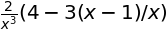

In [23]:
x = sym.symbols('x')
sym.init_printing(use_unicode=True)  # Pretty output
expr = sym.log(x)*(x - 1)  # Define the function as a variable

rem_diff = expr.diff(x, 4)    # Calculate the fourth derivative of the function, note that it can be called as a method
rem_diff

Now we have the derivative we were looking for and we can now write the remainder term:
$$ R_3(x) = \left[ \frac{1}{3 x^3} - \frac{(x - 1)}{4 x^4} \right] (x - 1)^4 $$

Just as in the last exercise, we will use lambdify for the expressions computed by sympy.

In [24]:
# Use lambdify from sympy to convert series_expr into an anonymous function
f_series = sym.lambdify(x, series_expr.removeO(), "numpy")

# Calculate the Taylor polynomial value when x = 0.5, this is the first answer
print(f'P(0.5) = {f_series(0.5)}')

# Here we split the remainder term into two separate expressions just to avoid
# doing more work than need be; we already have the derivative in a function 
# using lambdify and we just needed the other part from the remainder term as a
# function, which corresponds to the variable expr1
expr1 = lambda x: (x-1)**4 / factorial(4)
expr2 = sym.lambdify(x, rem_diff, "numpy")

# Print the remainder term output for x = 0.5
print(f'R_3(0.5) = {expr1(0.5)*expr2(0.5)}')

# Finally, let us calculate the actual error
print(f'|f(0.5)-P(0.5)| = {f_1(0.5)-f_series(0.5)}')

P(0.5) = 0.3125
R_3(0.5) = 0.29166666666666663
|f(0.5)-P(0.5)| = 0.03407359027997264


And the last answer for this part is $\left| f(0.5) - P(0.5) \right| \leq 0.291666 ,$ this is the upper bound we were looking for. Also, if we compare it to the actual error (the last value computed) we can see that the actual error is within the error bound, thus making this a good approximation of the function.

b. There is nothing else to be done here since the value for $x_0$ lies within the interval $[0.5, 1.5]$ and so the upper bound is the same as the one found in the last part.

In [27]:
# Print the value for quad for the taylor polynomial
print(f'Integral of P, between 0.5 and 1.5 = {quad(f_series, 0.5, 1.5)[0]}')

# And as a comparasion we calculate the real value for the integral
print(f'Integral of f, between 0.5 and 1.5 = {quad(f_1, 0.5, 1.5)[0]}')

Integral of P, between 0.5 and 1.5 = 0.08333333333333334
Integral of f, between 0.5 and 1.5 = 0.08802039174945886


d. For this last part, we need to find the upper bound for the error of the value calculated before; actually, this is quite simple, since the solution is just to integrate the function $f(x) = (x - 1)^4 ,$ but we already have this as a lambda expresion called _expr1_.

In [39]:
# Print the value for integral of the function
print(f'Upper bound for R(x) = {expr2(0.5)*quad(expr1, 0.5, 1.5)[0]}')

# For completeness, let us print the actual error
print(f'Actual error = {abs(quad(f_1, 0.5, 1.5)[0] - quad(f_series, 0.5, 1.5)[0])}')

Upper bound for R(x) = 0.05833333333333335
Actual error = 0.004687058416125517


Thus the answer is 
$$ \left| \int_{0.5}^{1.5} f(x) dx - \int_{0.5}^{1.5} P_{3}(x) dx \right| \leq \int_{0.5}^{1.5} R_{3}(x) dx \leq 0.05833333333 ,$$
if we compare this upper bound with the actual error, we can see the we are well within the error bound and we can safely claim that our approximation is good enough.